In [426]:
import numpy as np 
import pandas as pd 


In [427]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [428]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [429]:
# Checking out our data
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Getting the title of each person from their name**

In [430]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Z,a-z]+)\. ', expand=False)
print(train_data['Title'].value_counts())
test_data['Title'] = test_data['Name'].str.extract(' ([A-Z,a-z]+)\. ', expand=False)
print(test_data['Title'].value_counts())

print(train_data[train_data['Title'] == 'Ms'])


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64
     PassengerId  Survived  Pclass                       Name     Sex   Age   
443          444         1       2  Reynaldo, Ms. Encarnacion  female  28.0  \

     SibSp  Parch  Ticket  Fare Cabin Embarked Title  
443      0      0  230434  13.0   NaN        S    Ms  


In [431]:
print(train_data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [432]:

grouped = train_data.groupby(['Sex', 'Pclass'])['Age'].transform('median')
train_data['Age'].fillna(grouped, inplace=True)

grouped = test_data.groupby(['Sex', 'Pclass'])['Age'].transform('median')
test_data['Age'].fillna(grouped, inplace=True)


In [433]:
# Update cabin


train_data.loc[pd.notna(train_data['Cabin']), 'Cabin'] = train_data['Cabin'].str[0]
train_data.loc[pd.isna(train_data['Cabin']), 'Cabin'] = 'M'

test_data.loc[pd.notna(test_data['Cabin']), 'Cabin'] = test_data['Cabin'].str[0]
test_data.loc[pd.isna(test_data['Cabin']), 'Cabin'] = 'M'
#train_data.loc[train_data['Cabin'] != None, 'Cabin'] = train_data['Cabin'][0] <- wrong syntax

print(train_data['Cabin'].value_counts())
print(test_data['Cabin'].value_counts())





Cabin
M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
Cabin
M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64


In [434]:
# Find null values in our dataframe, we will see we are missing alot of age values
#train_data.info()

# Replace the missing age with the mean of their ages

# print(train_data['Age'].median())

# train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
# test_data['Age'].fillna(test_data['Age'].median(), inplace = True)

# i dont know why the test data has a missing fare
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace= True)

# replace the missing embarked with the most common label
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)

In [435]:
extraClasses = ['Countess',  'Lady', 'Rev', 'Mme', 'Major', 'Col', 'Jonkheer', 'Dr', 'Don', 'Sir', 'Mlle', 'Master', 'Capt', 'Ms','Dona']

# simplfying the data
for x in extraClasses:

    # if True in train_data['Title'].isin([x]):
    # print(train_data['Age'].value_counts())

    train_data.loc[(train_data['Age'] >= 30) & (train_data['Sex'] == 'female') & (train_data['Title'] == x), 'Title'] = 'Mrs'
    train_data.loc[(train_data['Age'] < 30) & (train_data['Sex'] == 'female') & (train_data['Title'] == x), 'Title'] = 'Miss'
    train_data.loc[(train_data['Sex'] == 'male') & (train_data['Title'] == x), 'Title'] = 'Mr'

    test_data.loc[(test_data['Age'] >= 30) & (test_data['Sex'] == 'female') & (test_data['Title'] == x), 'Title'] = 'Mrs'
    test_data.loc[(test_data['Age'] < 30) & (test_data['Sex'] == 'female') & (test_data['Title'] == x), 'Title'] = 'Miss'
    test_data.loc[(test_data['Sex'] == 'male') & (test_data['Title'] == x), 'Title'] = 'Mr'





In [436]:
print(train_data['Title'].value_counts())
print(test_data['Title'].value_counts())
test_data.loc[(test_data['Title']) == 'Ms']

Title
Mr      577
Miss    186
Mrs     128
Name: count, dtype: int64
Title
Mr      266
Miss     79
Mrs      73
Name: count, dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [437]:
features = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'Embarked', 'Cabin','Title']
output = ['Survived']


In [438]:
from sklearn.preprocessing import LabelEncoder

# convert all labels to numerical values
label = LabelEncoder()
train_data['Sex'] = label.fit_transform(train_data['Sex'])
train_data['Embarked'] = label.fit_transform(train_data['Embarked'])
test_data['Sex'] = label.fit_transform(test_data['Sex'])
test_data['Embarked'] = label.fit_transform(test_data['Embarked'])

train_data['Title'] = label.fit_transform(train_data['Title'])
test_data['Title'] = label.fit_transform(test_data['Title'])

train_data['Cabin'] = label.fit_transform(train_data['Cabin'])
test_data['Cabin'] = label.fit_transform(test_data['Cabin'])







In [439]:
# from sklearn.preprocessing import MinMaxScaler

# features_scaled = ['Age', 'Fare']

# # %% Scalling the Values:

# minmax = MinMaxScaler()
# data.loc[:, ['Age', 'Fare']] = minmax.fit_transform(data.loc[:, ['Age', 'Fare']])
# test.loc[:, ['Age', 'Fare']] = minmax.fit_transform(test.loc[:, ['Age', 'Fare']])

<Axes: >

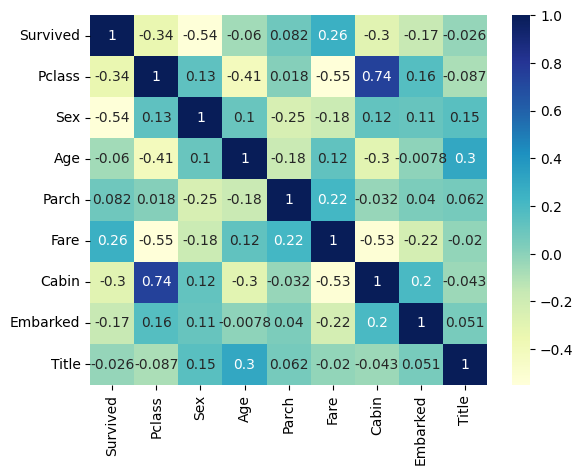

In [440]:
# show correlation between each numerical variable from each other
import matplotlib.pyplot as plt
import seaborn as sns

temp_data = train_data.drop(columns= ['Name', 'Ticket', 'PassengerId', 'SibSp'])
sns.heatmap(temp_data.corr(), cmap = 'YlGnBu', annot= True)
# plt.show()

In [441]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


# X_train, X_test, y_train, y_test = train_test_split(train_data[features], train_data[output], test_size=0.42, random_state=31)

# Use stratified shuffle since there is an unequal amount of surviors compared to decreased
split = StratifiedShuffleSplit(n_splits= 1, test_size = 0.2, random_state = 42)


for train_index, test_index in split.split(train_data[features], train_data["Survived"]):
    X_train, X_test = train_data[features].iloc[train_index], train_data[features].iloc[test_index]
    y_train, y_test = train_data["Survived"].iloc[train_index], train_data["Survived"].iloc[test_index]

y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1 , 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(test_data.shape)

print(X_train[:5])


(712, 9)
(712, 1)
(179, 9)
(179, 1)
(418, 12)
     Sex  Pclass  SibSp  Parch   Age      Fare  Embarked  Cabin  Title
692    1       3      0      0  25.0   56.4958         2      7      1
481    1       2      0      0  30.0    0.0000         2      7      1
527    1       1      0      0  40.0  221.7792         2      2      1
855    0       3      0      1  18.0    9.3500         2      7      2
801    0       2      1      1  31.0   26.2500         2      7      2


(array([110.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  69.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

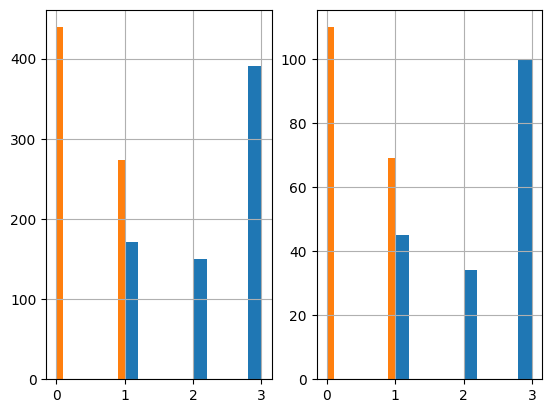

In [442]:
# showed stratified shuffle worked
plt.subplot(1,2,1)
X_train['Pclass'].hist()
plt.hist(y_train)

plt.subplot(1,2,2)
X_test['Pclass'].hist()
plt.hist(y_test)


In [443]:
test = test_data[features]
test.head()

,Sex,Pclass,SibSp,Parch,Age,Fare,Embarked,Cabin,Title
0,1,3,0,0,34.5,7.8292,1,7,1
1,0,3,1,0,47.0,7.0000,2,7,2
2,1,2,0,0,62.0,9.6875,1,7,1
3,1,3,0,0,27.0,8.6625,2,7,1
4,0,3,1,1,22.0,12.2875,2,7,2


In [444]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

test = scaler.fit_transform(test)





In [445]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logReg = LogisticRegression(random_state = 0).fit(X_train, y_train)
y_pred = logReg.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print(X_test.shape, y_test.shape)
print(logReg.score(X_test, y_test))
print(f"accuracy: {accuracy}")



(179, 9) (179, 1)
0.8100558659217877
accuracy: 0.8100558659217877


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Random Forest model**

In [446]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid =  {'n_estimators': [100,500,1000], 
                                  'max_depth': [3,5,10,],
                                  'min_samples_leaf': [2,5],
                                  'min_samples_split': [2,5]}

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_train, y_train)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True, scoring='accuracy')

In [447]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=500)

In [448]:
best_rf = final_clf.fit(X_train,y_train)
final_clf.score(X_test, y_test)

/var/folders/bd/126yvkv50d1cjxc0144dqz4c0000gn/T/ipykernel_35928/869476826.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf = final_clf.fit(X_train,y_train)


0.7821229050279329

In [449]:
import xgboost as xg

param_grid = {

    'n_estimators': [100, 200, 300],
    'verbosity': [0],
    'n_jobs' : [-1]
}

xgb_r = xg.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_

best_xgb_model
best_xgb_model.fit(X_train, y_train)
xg_score = best_xgb_model.score(X_test, y_test)
print(xg_score)
# xbr1 = xgb_r.score(X_test, y_test)
# xbr1

xg_results = best_xgb_model.predict(test)







0.39106145251396646


**Kaggle submission for random forest and logistic reg**

In [450]:
log_reg_results = logReg.predict(test)
random_forest_results = final_clf.predict(test)


print(random_forest_results[:5])

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': random_forest_results})
output.to_csv('randomForestClassifier.csv', index=False)
print("randomForestClassifier was successfully saved!")

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': log_reg_results})
output.to_csv('logistic_Regression.csv', index=False)
print("Logistic regression submission was successfully saved!")

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': xg_results})
output.to_csv('xg.csv', index=False)
print("XG submission was successfully saved!")


[0 0 0 0 0]
randomForestClassifier was successfully saved!
Logistic regression submission was successfully saved!
XG submission was successfully saved!


In [451]:
import torch
import torch.nn as nn

class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FNN, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 

        # Non-linearity
        self.sigmoid = nn.Sigmoid()

        # Relu
        self.relu = nn.ReLU()
        
        # hidden layer linear functions
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)

        # Linear function (readout)
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)

        # Non-linearity  # NON-LINEAR
        out = self.relu(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

In [452]:
input_size = X_train.shape[1]
hidden_size = X_train.shape[1]
output_size = 1

print(f"input size: {input_size}\nhidden size: {hidden_size}\noutput size: {output_size}")

input size: 9
hidden size: 9
output size: 1


In [453]:
# Parameters
epochs = 600
criterion = nn.BCELoss()
learning_rate = 0.01



In [454]:
model = FNN(input_size, hidden_size, output_size)

optimizer = optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [455]:
#converting data into tensors for deep learning

# # converting dataframe to numpy
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

# converting numpy to tensor
X_train_tensor = torch.Tensor(X_train)
X_test_tensor = torch.Tensor(X_test)
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)



In [456]:
losses = []
for epoch in range(epochs):
  y_pred = model(X_train_tensor)

  # for a,b in zip(y_pred, y_train_tensor):
  #   print(a,b)

  loss = criterion(y_pred, y_train_tensor)
  losses.append(loss.item())

  model.zero_grad()
  loss.backward()
  optimizer.step()

  print(f"Epoch {epoch+1}: Loss = {loss.item()}")


Epoch 1: Loss = 0.7006142139434814
Epoch 2: Loss = 0.6942346692085266
Epoch 3: Loss = 0.6884974241256714
Epoch 4: Loss = 0.6831416487693787
Epoch 5: Loss = 0.6779742240905762
Epoch 6: Loss = 0.6728838086128235
Epoch 7: Loss = 0.6678646206855774
Epoch 8: Loss = 0.6626129150390625
Epoch 9: Loss = 0.6567330956459045
Epoch 10: Loss = 0.6502421498298645
Epoch 11: Loss = 0.6431177258491516
Epoch 12: Loss = 0.6352760791778564
Epoch 13: Loss = 0.626676619052887


Epoch 14: Loss = 0.6173335909843445
Epoch 15: Loss = 0.6072595119476318
Epoch 16: Loss = 0.5965553522109985
Epoch 17: Loss = 0.5852961540222168
Epoch 18: Loss = 0.5735514163970947
Epoch 19: Loss = 0.5614438056945801
Epoch 20: Loss = 0.5491284728050232
Epoch 21: Loss = 0.5367467403411865
Epoch 22: Loss = 0.5246262550354004
Epoch 23: Loss = 0.5129917860031128
Epoch 24: Loss = 0.5019418001174927
Epoch 25: Loss = 0.4916653633117676
Epoch 26: Loss = 0.4825160503387451
Epoch 27: Loss = 0.47430041432380676
Epoch 28: Loss = 0.4667853116989136
Epoch 29: Loss = 0.45997971296310425
Epoch 30: Loss = 0.4538828730583191
Epoch 31: Loss = 0.44862112402915955
Epoch 32: Loss = 0.44409534335136414
Epoch 33: Loss = 0.44029852747917175
Epoch 34: Loss = 0.437242329120636
Epoch 35: Loss = 0.43476593494415283
Epoch 36: Loss = 0.4326194226741791
Epoch 37: Loss = 0.4307534694671631
Epoch 38: Loss = 0.42893779277801514
Epoch 39: Loss = 0.4271314740180969
Epoch 40: Loss = 0.42505329847335815
Epoch 41: Loss = 0.42

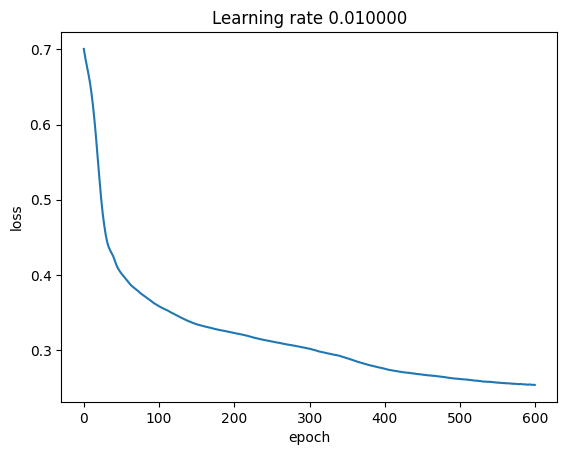

In [457]:
import matplotlib.pyplot as plt


plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %3f"%(learning_rate))
plt.show()

In [458]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()
print(X_test_tensor.shape)
with torch.no_grad():
    y_pred = model(X_test_tensor)
y_pred_binary = (y_pred >= 0.5).float()


y_test_np = y_test_tensor.cpu().numpy()
y_pred_binary_np = y_pred_binary.cpu().numpy()

print(y_pred_binary_np[:5])


accuracy = accuracy_score(y_test_np, y_pred_binary_np)
precision = precision_score(y_test_np, y_pred_binary_np)
recall = recall_score(y_test_np, y_pred_binary_np)
f1 = f1_score(y_test_np, y_pred_binary_np)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

torch.Size([179, 9])
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Accuracy: 0.7207
Precision: 0.6267
Recall: 0.6812
F1 Score: 0.6528


In [459]:

# print(test.values[0], X_test[0])
test_data_tensor = torch.Tensor(test)

with torch.no_grad():
    fnn_results = model(test_data_tensor)

fnn_bin_results = (fnn_results >= 0.5).float()


print(fnn_results.shape)
fnn_bin_results_np = fnn_bin_results.numpy()
FNN_result = fnn_bin_results_np.ravel().astype(int)

print(FNN_result[:5])


output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': FNN_result})
output.to_csv('FNN.csv', index=False)
print("FNN submission was successfully saved!")

torch.Size([418, 1])
[0 0 0 0 0]
FNN submission was successfully saved!
